# Interactive Analysis

Demonstration of how to import simulation for analysis

In [102]:
from analysis.homogeneous.analysis import print_res, convert_to_reward, calculate_expected_reward
import numpy as np
import random
import pandas as pd
from collections import defaultdict 


In [2]:
from simulation.classes.sim import Simulation

In [3]:
random.seed(1)
np.random.seed(1)
num_floors = 4 # must be 4 for now
# Declare the simulation
sim = Simulation(num_floors)

In [4]:
df = []
wait = []

In [5]:
wait_times=defaultdict(list)
 # for idx, cycle_data in enumerate(simulation_data):
    #     elevator_1.append(cycle_data.elloc[cycle_data.elevator_state['elevator_id'] == 1])
    #     elevator_2.append(cycle_data.elevator_state.loc[cycle_data.elevator_state['elevator_id'] == 2])

In [14]:
for idx, data in enumerate(sim.simulate(72000)):
    print("cycle:", idx)
    print("cycle duration:", data.cycle_duration)
    df.append(data)
    # print("start: ", data.start_time, "end: ", data.end_time)
    # print(data.passengers)
    a = data.passengers.groupby(['source']).sum()
    zeroes = pd.DataFrame(0, index = range(1,num_floors+1),columns = a.columns ).astype(float)
    # print(a.iloc[[0]])
    # replace values


    zeroes.loc[a.index, a.columns] = a
    wait.append(zeroes['wait_time'])
    # print(zeroes['wait_time'])
    # print(a['wait_time'])




cycle: 0
cycle duration: 8.086330078190038
cycle: 1
cycle duration: 55.42526387035384
cycle: 2
cycle duration: 154.5
cycle: 3
cycle duration: 7.245395627557087
cycle: 4
cycle duration: 127.37043909951163
cycle: 5
cycle duration: 153.08790369701182
cycle: 6
cycle duration: 517.6788610000118
cycle: 7
cycle duration: 55.275232664571604
cycle: 8
cycle duration: 165.5
cycle: 9
cycle duration: 225.22180588414585
cycle: 10
cycle duration: 43.0469624017519
cycle: 11
cycle duration: 215.0
cycle: 12
cycle duration: 121.17676115642507
cycle: 13
cycle duration: 332.7080884240818
cycle: 14
cycle duration: 203.0
cycle: 15
cycle duration: 66.0
cycle: 16
cycle duration: 13.610996135650566
cycle: 17
cycle duration: 297.0813128723462
cycle: 18
cycle duration: 244.0
cycle: 19
cycle duration: 88.90432056851114
cycle: 20
cycle duration: 126.9302232064374
cycle: 21
cycle duration: 226.26826958455104
cycle: 22
cycle duration: 504.6483785524374
cycle: 23
cycle duration: 387.49999999999955
cycle: 24
cycle dura

In [104]:
import pandas as pd
all_data_df = pd.read_csv('all_data.tsv', sep='\t')


In [105]:
all_data_df.head()

,controller,idle_floor_config,num_cycles,wait_time,wait_time_interval,idle_time,idle_time_interval
0,Random,"(2, 2, 2)",161,4.446763,0.038650,0.578481,0.013610
1,Zoning,"(2, 2, 2)",143,4.269960,0.029409,0.440095,0.011801
2,Nearest,"(2, 2, 2)",354,3.516983,0.028534,0.334979,0.010982
3,Random,"(3, 5, 6)",169,4.478500,0.034170,0.567962,0.012731
4,Zoning,"(3, 5, 6)",157,4.150839,0.028873,0.437016,0.010732


In [5]:
# importing the required module 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
print(all_data_df.loc[1, 'idle_floor_config'])

(2, 2, 2)


<Axes: xlabel='wait_time', ylabel='idle_time'>

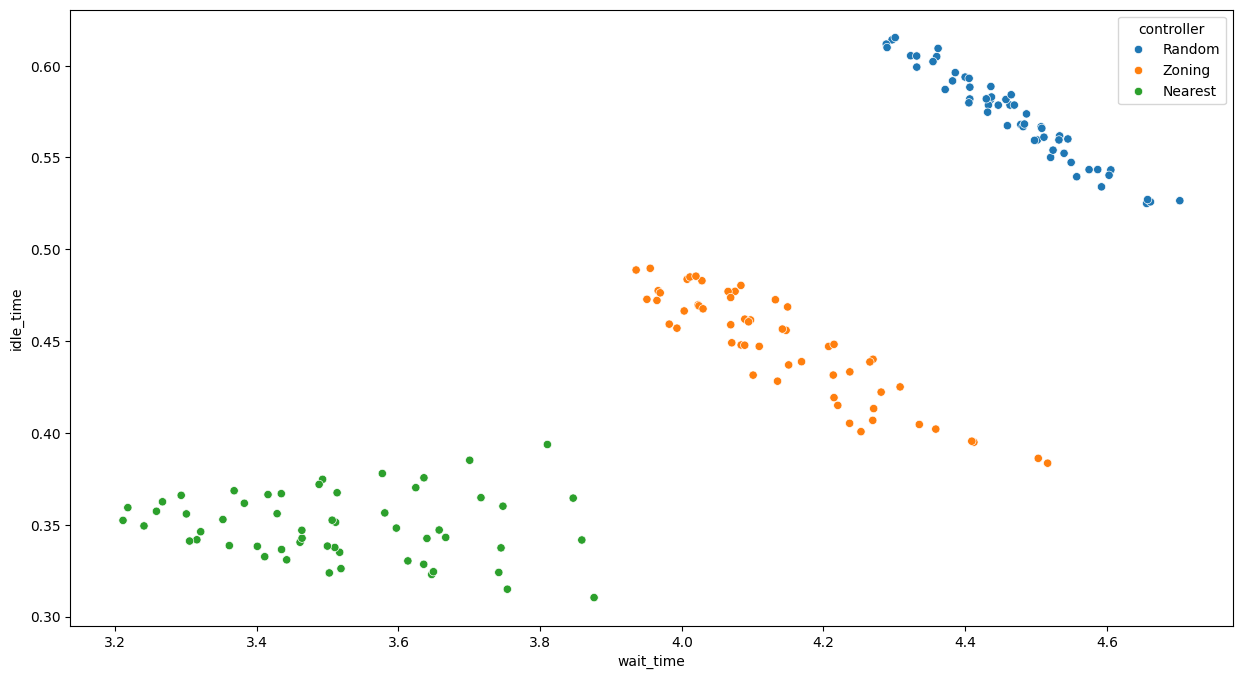

In [139]:
# df = all_data_df.loc[all_data_df['controller'] == 'Random']
df = all_data_df
# print(df)
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='wait_time', y= 'idle_time', hue="controller")
# for i in df.index:
#     plt.text(df.loc[i, 'wait_time'], df.loc[i, 'idle_time'], df.loc[i, 'idle_floor_config'])



In [57]:

all_data_df['wait_time_w_interval'] = pd.DataFrame(all_data_df['wait_time'] + all_data_df['wait_time_interval'])


In [94]:
# best_config = all_data_df.loc[all_data_df['wait_time'] < 3.3]
best = all_data_df.nsmallest(n=1, columns='wait_time_w_interval')
best_config = best.loc[:,'idle_floor_config'].values[0]
print(best_config)
all_data_df.loc[all_data_df['idle_floor_config'] == best_config]
# best_config.nsmallest(n=5, columns='wait_time')

(3, 3, 4)


,controller,idle_floor_config,num_cycles,wait_time,wait_time_interval,idle_time,idle_time_interval,wait_time_w_interval
93,Random,"(3, 3, 4)",200,4.301266,0.035940,0.615279,0.012410,4.337205
94,Zoning,"(3, 3, 4)",192,4.083464,0.031577,0.480329,0.012607,4.115040
95,Nearest,"(3, 3, 4)",375,3.211126,0.030361,0.352345,0.011523,3.241487


In [74]:
# best idle_floor_config is (3,3,4)
all_data_df.loc[all_data_df['idle_floor_config'] == '(3, 3, 4)']

,controller,idle_floor_config,num_cycles,wait_time,wait_time_interval,idle_time,idle_time_interval,wait_time_w_interval
93,Random,"(3, 3, 4)",200,4.301266,0.035940,0.615279,0.012410,4.337205
94,Zoning,"(3, 3, 4)",192,4.083464,0.031577,0.480329,0.012607,4.115040
95,Nearest,"(3, 3, 4)",375,3.211126,0.030361,0.352345,0.011523,3.241487


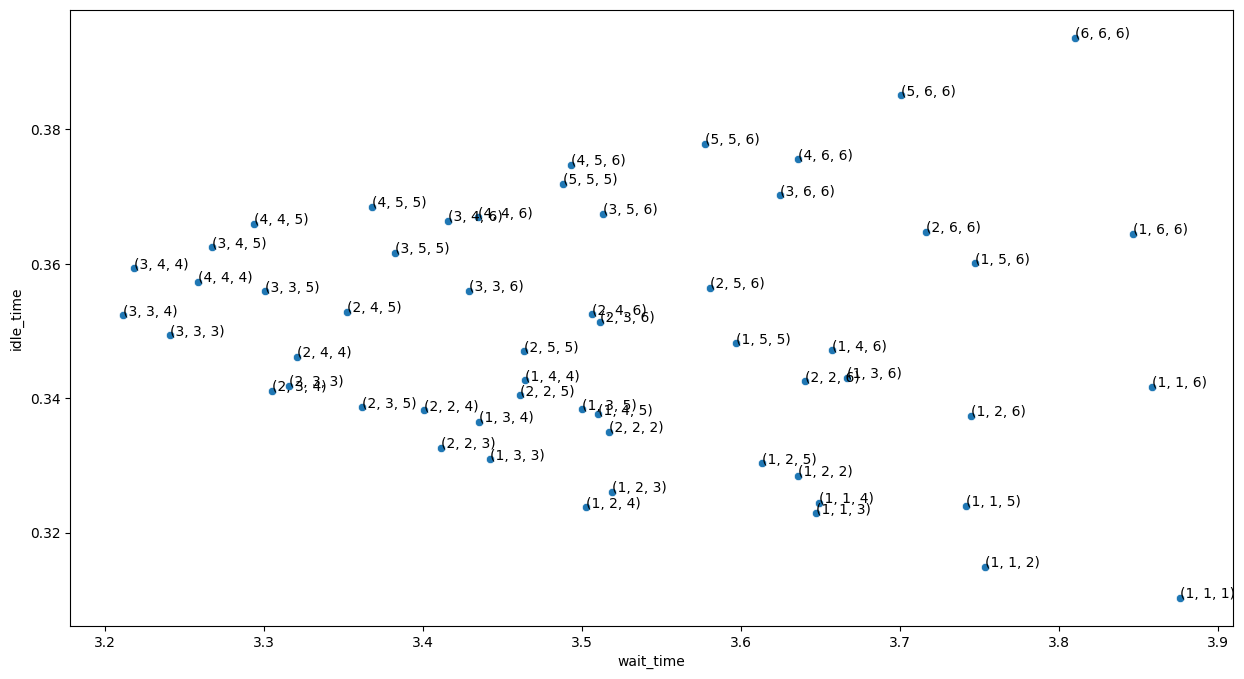

In [118]:
a = all_data_df.loc[all_data_df['controller'] == "Nearest" ]
plt.figure(figsize=(15,8))
# y_errormin = a.loc[:, "idle_time_interval"]
# y_errormax = a.loc[:,"idle_time_interval"]
sns.scatterplot(data=a, x='wait_time', y= 'idle_time')
# plt.errorbar(x = a['wait_time'], y =a['idle_time'], xerr = a['wait_time_interval'], yerr = a['idle_time_interval'], fmt = 'o')
for i in a.index:
    plt.text(all_data_df.loc[i, 'wait_time'], all_data_df.loc[i, 'idle_time'], all_data_df.loc[i, 'idle_floor_config'])

# 
# y_error =[y_errormin, y_errormax]

# # plotting graph
# plt.errorbar(x, y, yerr = y_error, fmt ='o')